In [1]:
using Revise

In [ ]:
# using OpticalBlochEquations
using QuantumStates
using LinearAlgebra
using Parameters
using CompositeStructs
using BenchmarkTools

In [ ]:
function squared_error(data_xs, data_ys, preds)
    """
    data = NamedTuple(xs, ys)
    pred = f.(data.xs)
    """
    errors = (data_ys .- preds).^2
    return sum(errors)
end
;

In [ ]:
@consts begin
    ħ = 1.054e-34
    c = 3.0e8
    ϵ₀ = 8.854e-12
    kB = 1.381e-23
    T = 295
end
;

In [ ]:
@composite @kwdef mutable struct HundsCaseB_VibRot <: HundsCaseB
    p::Int64
    v1::Float64
    v2::Float64
    v3::Float64
    HundsCaseB_Rot...
end
;

In [ ]:
function Γ(state::HundsCaseB_VibRot, state′::HundsCaseB_VibRot)
    E = state.E
    E′ = state′.E
    ΔE = E′ - E
    if ΔE > 0.0
        return (8π^2 / (3ϵ₀*ħ*c^3)) * abs(ΔE)^3 * TDM(state, state′)^2
    end
    return 0.0
end
;

In [7]:
function blackbody_rate(state::HundsCaseB, state′::HundsCaseB)
    E = state.E
    E′ = state′.E
    ΔE_abs = abs(E′ - E)  
    if ΔE_abs > 0.0
#         return TDM(state, state′)^2
        return (8π^2 / (3ϵ₀*ħ*c^3)) * (1 / (exp(ħ * (2π * ΔE_abs) / (kB * T)) - 1)) * 
            ΔE_abs^3 * TDM(state, state′)^2
    end
    return 0.0
end
;

In [8]:
function parity_rule(state::HundsCaseB_VibRot, state′::HundsCaseB_VibRot)
    p = state.p
    p′ = state′.p
    return δ(-p,p′)
end
; 

In [9]:
# Spectroscopic constants for X(000)
# (Scurlock et al.)
@consts begin
    B_X000 = 10023.0841
    D_X000 = 1.154e-2
    γ_X000 = 34.7593
end
;

In [10]:
function set_parity!(basis, sgn=1)
    for i in eachindex(basis)
        N = basis[i].N
        basis[i].p = sgn * (1 * iseven(N) - 1 * isodd(N))
    end
    return nothing
end
;

### Enumerate states in $X^2 \Sigma^+$ of CaOH

In [11]:
N_max = 5;

### $(v_1 v_2^\ell v_3) = (000)$

In [12]:
E_X000 = 0.0

QN_bounds = (E = E_X000, v1 = 0, v2 = 0, v3 = 0, S = 1/2, I = 1/2, Λ = 0, N = 0:N_max)
X000_basis = enumerate_states(HundsCaseB_VibRot, QN_bounds)
set_parity!(X000_basis)
;

### $(v_1 v_2^\ell v_3) = (100)$

In [13]:
E_X100 = 1e2 * 600 * c

QN_bounds = (E = E_X100, v1 = 1, v2 = 0, v3 = 0, S = 1/2, I = 1/2, Λ = 0, N = 0:N_max)
X100_basis = enumerate_states(HundsCaseB_VibRot, QN_bounds)
set_parity!(X100_basis)
;

### $(v_1 v_2^\ell v_3) = (200)$

In [14]:
E_X200 = 2E_X100

QN_bounds = (E = E_X200, v1 = 2, v2 = 0, v3 = 0, S = 1/2, I = 1/2, Λ = 0, N = 0:N_max)
X200_basis = enumerate_states(HundsCaseB_VibRot, QN_bounds)
set_parity!(X200_basis)
;

### $(v_1 v_2^\ell v_3) = (300)$

In [15]:
E_X300 = 3E_X100

QN_bounds = (E = E_X300, v1 = 3, v2 = 0, v3 = 0, S = 1/2, I = 1/2, Λ = 0, N = 0:N_max)
X300_basis = enumerate_states(HundsCaseB_VibRot, QN_bounds)
set_parity!(X300_basis)
;

### $(v_1 v_2^\ell v_3) = (01^10)$

In [16]:
E_X0110 = 1e2 * 352 * c

QN_bounds = (E = E_X0110, v1 = 0, v2 = 1, v3 = 0, S = 1/2, I = 1/2, Λ = 1, N = 1:N_max)
X0110_basis_p_parity = enumerate_states(HundsCaseB_VibRot, QN_bounds)
set_parity!(X0110_basis_p_parity)

X0110_basis_m_parity = enumerate_states(HundsCaseB_VibRot, QN_bounds)
set_parity!(X0110_basis_m_parity, -1)

X0110_basis = [X0110_basis_p_parity; X0110_basis_m_parity]
;

### $(v_1 v_2^\ell v_3) = (02^00)$

In [17]:
E_X0200 = 2E_X0110

QN_bounds = (E = E_X0200, v1 = 0, v2 = 2, v3 = 0, S = 1/2, I = 1/2, Λ = 0, N = 0:N_max)
X0200_basis = enumerate_states(HundsCaseB_VibRot, QN_bounds)
set_parity!(X0200_basis)
;

### $(v_1 v_2^\ell v_3) = (02^20)$

In [18]:
E_X0220 = E_X0200

QN_bounds = (E = E_X0220, v1 = 0, v2 = 2, v3 = 0, S = 1/2, I = 1/2, Λ = 2, N = 2:N_max)
X0220_basis_p_parity = enumerate_states(HundsCaseB_VibRot, QN_bounds)
set_parity!(X0220_basis_p_parity)

X0220_basis_m_parity = enumerate_states(HundsCaseB_VibRot, QN_bounds)
set_parity!(X0220_basis_m_parity, -1)

X0220_basis = [X0220_basis_p_parity; X0220_basis_m_parity]
;

### $(v_1 v_2^\ell v_3) = (11^10)$

In [19]:
E_X1110 = E_X100 + E_X0110

QN_bounds = (E = E_X1110, v1 = 1, v2 = 1, v3 = 0, S = 1/2, I = 1/2, Λ = 1, N = 1:N_max)
X1110_basis_p_parity = enumerate_states(HundsCaseB_VibRot, QN_bounds)
set_parity!(X1110_basis_p_parity)

X1110_basis_m_parity = enumerate_states(HundsCaseB_VibRot, QN_bounds)
set_parity!(X1110_basis_m_parity, -1)

X1110_basis = [X1110_basis_p_parity; X1110_basis_m_parity]
;

### $A(000)$

In [29]:
QN_bounds = (S = 1/2, I = 1/2, Λ = 1, Σ = -1/2, Ω = 1/2, J = 1/2)
@time A000_basis = enumerate_states(HundsCaseA_Rot, QN_bounds)
;

  0.000143 seconds (329 allocations: 18.172 KiB)


In [30]:
A000_basis

4-element Vector{HundsCaseA_Rot}:
 HundsCaseA_Rot(0.0, 1//2, 1//2, 1//1, 1//2, 1//2, -1//2, 0//1, 0//1, (Ω = -0.5:1.0:0.5, Σ = -0.5:1.0:0.5, F = 0.0:1.0:1.0, M = 0.0:1.0:0.0))
 HundsCaseA_Rot(0.0, 1//2, 1//2, 1//1, 1//2, 1//2, -1//2, 1//1, -1//1, (Ω = -0.5:1.0:0.5, Σ = -0.5:1.0:0.5, F = 0.0:1.0:1.0, M = -1.0:1.0:1.0))
 HundsCaseA_Rot(0.0, 1//2, 1//2, 1//1, 1//2, 1//2, -1//2, 1//1, 0//1, (Ω = -0.5:1.0:0.5, Σ = -0.5:1.0:0.5, F = 0.0:1.0:1.0, M = -1.0:1.0:1.0))
 HundsCaseA_Rot(0.0, 1//2, 1//2, 1//1, 1//2, 1//2, -1//2, 1//1, 1//1, (Ω = -0.5:1.0:0.5, Σ = -0.5:1.0:0.5, F = 0.0:1.0:1.0, M = -1.0:1.0:1.0))

In [88]:
for i in 1:144
    println(overlap(A000_basis[2], X000_basis[i]))
end

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0


### Add blackbody-induced transitions and spontaneous emission

In [744]:
basis = [
    X000_basis
    X100_basis
    X200_basis
    X300_basis
    X0110_basis
    X0200_basis
    X0220_basis
    X1110_basis
    ]
;

In [745]:
X000_idxs, _ = subspace(basis, (v1 = (0,0), v2 = (0,0)))
X100_idxs, _ = subspace(basis, (v1 = (1,1), v2 = (0,0)))
X200_idxs, _ = subspace(basis, (v1 = (2,2), v2 = (0,0)))
X300_idxs, _ = subspace(basis, (v1 = (3,3), v2 = (0,0)))
X0110_idxs, _ = subspace(basis, (v1 = (0,0), v2 = (1,1)))
X0200_idxs, _ = subspace(basis, (v2 = (2,2), Λ = (0,0)))
X0220_idxs, _ = subspace(basis, (v2 = (2,2), Λ = (2,2)))
X1110_idxs, _ = subspace(basis, (v1 = (1,1), v2 = (1,1)))
;

In [746]:
# Get indices of detectable states
X000_idxs_d, _ = subspace(basis, (v1 = (0,0), v2 = (0,0), N = (1,1), J = (1/2, 3/2)))
X100_idxs_d, _ = subspace(basis, (v1 = (1,1), v2 = (0,0), N = (1,1), J = (1/2, 3/2)))
X200_idxs_d, _ = subspace(basis, (v1 = (2,2), v2 = (0,0), N = (1,1), J = (1/2, 3/2)))
X300_idxs_d, _ = subspace(basis, (v1 = (3,3), v2 = (0,0), N = (1,1), J = (1/2, 3/2)))
X0110_idxs_d, _ = subspace(basis, (v1 = (0,0), v2 = (1,1), N = (1,2), p = (-1,-1)))
X0200_idxs_d, _ = subspace(basis, (v2 = (2,2), Λ = (0,0), N = (1,1), J = (1/2, 3/2)))
X0220_idxs_d, _ = subspace(basis, (v2 = (2,2), Λ = (2,2), N = (2,2), J = (1/2, 3/2), p = (-1,-1)))
X1110_idxs_d, _ = subspace(basis, (v1 = (1,1), v2 = (1,1), N = (1,2), J = (1/2, 3/2), p = (-1,-1)))
idxs_d = [
    X000_idxs_d
    X100_idxs_d
    X200_idxs_d
    X300_idxs_d
    X0110_idxs_d
    X0200_idxs_d
    X0220_idxs_d
    X1110_idxs_d
]
;

In [747]:
μ_M = zeros(Float64, length(basis), length(basis))
;

In [748]:
function update_μ_M!(μ_M, idxs, μ_v1, μ_v2)
    
    μ_M .= 0.0
    
    # Stretching modes
    μ_M[idxs.X000_idxs, idxs.X100_idxs] .= μ_v1^2
    μ_M[idxs.X100_idxs, idxs.X200_idxs] .= 2μ_v1^2
    μ_M[idxs.X200_idxs, idxs.X300_idxs] .= 3μ_v1^2
    
    # Bending modes
    μ_M[idxs.X000_idxs, idxs.X0110_idxs] .= 2μ_v2^2
    μ_M[idxs.X0110_idxs, idxs.X0200_idxs] .= 2μ_v2^2
    μ_M[idxs.X0110_idxs, idxs.X0220_idxs] .= 2μ_v2^2
    
    # Hybrid modes
    μ_M[idxs.X100_idxs, idxs.X1110_idxs] .= 2μ_v2^2
    μ_M[idxs.X0110_idxs, idxs.X1110_idxs] .= μ_v1^2
    
    μ_M .+= transpose(μ_M)
    
    return nothing
end
;

In [749]:
idxs = (
    X000_idxs = X000_idxs, 
    X100_idxs = X100_idxs, 
    X200_idxs = X200_idxs, 
    X300_idxs = X300_idxs, 
    X0110_idxs = X0110_idxs, 
    X0200_idxs = X0200_idxs, 
    X0220_idxs = X0220_idxs, 
    X1110_idxs = X1110_idxs
);

In [750]:
# idxs = @params (X000_idxs, X100_idxs, X200_idxs, X300_idxs, X0110_idxs, X0200_idxs, X0220_idxs, X1110_idxs);

In [751]:
# @btime update_μ_M!(μ_M, idxs, μ_v1, μ_v2)

In [752]:
blackbody_M = zeros(Float64, length(basis), length(basis))
Γ_M = zeros(Float64, length(basis), length(basis))
@time for (i, state) in enumerate(basis)
    for (j, state′) in enumerate(basis)
        blackbody_M[i,j] += parity_rule(state, state′) * blackbody_rate(state, state′)
        Γ_M[i,j] += parity_rule(state, state′) * Γ(state, state′)
    end
end
;

161.595611 seconds (1.83 G allocations: 56.577 GiB, 20.34% gc time, 0.01% compilation time)


In [753]:
function construct_rate_eqns!(R, p)
    
    update_μ_M!(p.μ_M, p.idxs, p.μ_v1, p.μ_v2)
    
    R .= 0.0
    for i in eachindex(p.basis)
        for j in eachindex(p.basis)
            R[i,j] += p.μ_M[i,j] * p.blackbody_M[i,j]
            R[i,j] += p.μ_M[i,j] * p.Γ_M[i,j]          
            
            R[j,j] -= p.μ_M[i,j] * p.blackbody_M[i,j]
            R[j,j] -= p.μ_M[i,j] * p.Γ_M[i,j]
        end
    end
    
    # Vacuum loss terms
    for i in eachindex(p.basis)
        R[i,i] -= (1 / p.τ_vacuum)
    end
    
    return nothing
end
;

In [754]:
μ_M = zeros(Float64, length(basis), length(basis))
μ_v1 = 0.30 * 3.336e-30
μ_v2 = 0.36 * 3.336e-30
τ_vacuum = 2.5
;

In [755]:
t_span = (0.0, 3.5)
R = zeros(Float64, length(basis), length(basis))
@time p0 = (
    μ_M = μ_M, 
    Γ_M = Γ_M, 
    blackbody_M = blackbody_M, 
    basis = basis, 
    idxs = idxs, 
    idxs_d = idxs_d,
    μ_v1 = μ_v1, 
    μ_v2 = μ_v2, 
    τ_vacuum = τ_vacuum,
    t_span = t_span,
    R = R
)
@time construct_rate_eqns!(R, p0)
;

  0.009901 seconds (3.00 k allocations: 159.252 KiB, 84.68% compilation time)
  0.413989 seconds (331.05 k allocations: 32.775 MiB, 72.47% compilation time)


In [756]:
# @btime construct_rate_eqns!($R, $p)

In [757]:
n0 = zeros(length(basis))
n0[X000_idxs_d[1]] = 0.75
# n0[X100_idxs_d[1]] = 0.65 # 0.0
;

In [758]:
using DifferentialEquations
using Plots
using BenchmarkTools

In [759]:
using LoopVectorization
function A_mul_B!(C, A, B)
    @tturbo for n ∈ indices((C,B), 2), m ∈ indices((C,A), 1)
        Cmn = zero(eltype(C))
        for k ∈ indices((A,B), (2,1))
            Cmn += A[m,k] * B[k,n]
        end
        C[m,n] = Cmn
    end
end

A_mul_B! (generic function with 1 method)

In [760]:
function rate_eqns!(dn, n, p, t)  
    A_mul_B!(dn, p.R, n)
    return nothing
end
;

In [761]:
# @btime rate_eqns!($dn0, $n0, $R, 1.0)

In [762]:
include("data.jl");

In [763]:
prob = ODEProblem(rate_eqns!, n0, p0.t_span, p0)
@time sol = DifferentialEquations.solve(prob, alg=DP5(), saveat=data.X000_xs)
;

  2.478134 seconds (2.76 M allocations: 146.514 MiB, 96.26% compilation time)


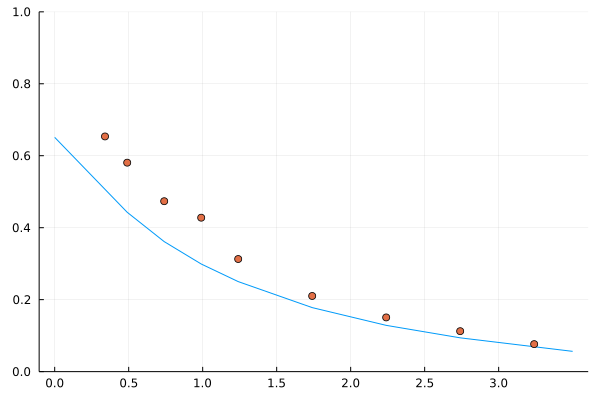

In [764]:
times = 0:10e-3:t_span[2]
sol_values = sol(times)

detectable = [sum(u[idxs_d]) for u in sol_values]

plot(times, detectable, legend=nothing)
plot!(
    xticks=0.0:0.5:3.0,
    yticks=0.0:0.2:1.0,
    ylim=(0,1)
)
scatter!(data.X000_xs, data.X000_ys)

In [765]:
preds = [sum(u[p0.idxs_d]) for u in sol.u]
error = squared_error(data.X000_xs, data.X000_ys, preds)

0.07565328644740317

In [766]:
pred(sol, ts, idxs) = [sum(sol(t)[idxs]) for t in ts]

pred (generic function with 1 method)

In [767]:
preds = pred(sol, data.X000_xs, p0.idxs_d)
squared_error(data.X000_xs, data.X000_ys, preds)

0.07565328644740317

In [768]:
using ProgressMeter

In [769]:
μ_v1 = (0.20:0.02:0.40) .* 3.336e-30
μ_v2 = (0.20:0.02:0.40) .* 3.336e-30
τ_vacuum = 1.5:0.1:2.5
n0_X000 = 0.7:0.02:0.8
n0_X100 = 0.7:0.02:0.8
imperfect_X100_prep = 0.0:0.05:0.20

grid = (
    μ_v1 = μ_v1,
    μ_v2 = μ_v2,
    τ_vacuum = τ_vacuum,
    n0_X000 = n0_X000,
    n0_X100 = n0_X100,
    imperfect_X100_prep = imperfect_X100_prep
)
;

In [770]:
function grid_scan(grid, prob, p0, data)
    
    grid_iterable = collect(Iterators.product(grid...))
    
    errors = []
    
    n0 = zeros(Float64, length(p0.basis))
    R = zeros(Float64, length(p0.basis), length(p0.basis))
    prob = ODEProblem(rate_eqns!, n0, p0.t_span, R)
    
    @showprogress for i in eachindex(grid_iterable)
        params = grid_iterable[i]
        
        p′ = NamedTuple{fieldnames(grid)}(params)
        p = (; p0..., p′...)
        
        construct_rate_eqns!(R, p)
        
        # Initialize in X(000)
        n0 .= 0.0
        n0[p0.idxs.X000_idxs[5]] = p.n0_X000
        new_prob = remake(prob, u0=n0, p=R)
        sol_X000 = DifferentialEquations.solve(new_prob, alg=DP5())
        
        X000_preds = pred(sol, data.X000_xs, p.idxs_d)
        error_X000 = squared_error(data.X000_xs, data.X000_ys, X000_preds)
        
        # Initialize in X(100)
        n0 .= 0.0
        n0[p.idxs.X100_idxs[5]] = (1 - p.imperfect_X100_prep) * p.n0_X100
        n0[p.idxs.X000_idxs[5]] = p.imperfect_X100_prep * p.n0_X100
        new_prob = remake(prob, u0=n0, p=R)
        sol_X100 = DifferentialEquations.solve(new_prob, alg=DP5())
        
        X100_preds = pred(sol, data.X100_xs, p.idxs_d)
        error_X100 = squared_error(data.X100_xs, data.X100_ys, X100_preds)
        
        push!(errors, error_X000 + error_X100)

#         print(round(i / length(grid_iterable), digits=2), " (", params, ")", ": ", round(error, digits=5), "\r")
#         flush(stdout)
        
    end
    return errors
end
;

In [670]:
# using ProgressMeter
# @time errors = grid_scan(grid, prob, p0, data)
# ;

### Reduce to $(N, \text{parity})$ subspace

In [771]:
function get_subsets(basis, N_max, initial_idx1, initial_idx2)
    Np_idxs = []
    
    idx = 1
    for N_iter ∈ 0:N_max
        for p_iter ∈ [-1,1]
            idxs, _ = subspace(basis, (N = (N_iter, N_iter), p = (p_iter, p_iter)))
            if !isempty(idxs)
                Np_idxs = [Np_idxs; (initial_idx2 + idx, N_iter, p_iter, initial_idx1 .+ idxs .- 1, length(idxs))]
                idx += 1
            end
        end
    end
    return (Np_idxs, initial_idx2 + idx - 1)
end
;

In [772]:
X000_Np_idxs, next_idx = get_subsets(X000_basis, N_max, X000_idxs[1], 0)
X100_Np_idxs, next_idx = get_subsets(X100_basis, N_max, X100_idxs[1], next_idx)
X200_Np_idxs, next_idx = get_subsets(X200_basis, N_max, X200_idxs[1], next_idx)
X300_Np_idxs, next_idx = get_subsets(X300_basis, N_max, X300_idxs[1], next_idx)
X0110_Np_idxs, next_idx = get_subsets(X0110_basis, N_max, X0110_idxs[1], next_idx)
X0200_Np_idxs, next_idx = get_subsets(X0200_basis, N_max, X0200_idxs[1], next_idx)
X0220_Np_idxs, next_idx = get_subsets(X0220_basis, N_max, X0220_idxs[1], next_idx)
X1110_Np_idxs, next_idx = get_subsets(X1110_basis, N_max, X1110_idxs[1], next_idx)

idxs_Np_all = [
    X000_Np_idxs
    X100_Np_idxs
    X200_Np_idxs
    X300_Np_idxs
    X0110_Np_idxs
    X0200_Np_idxs
    X0220_Np_idxs
    X1110_Np_idxs
]

idxs_Np = (
    X000_idxs = [x[1] for x in X000_Np_idxs],
    X100_idxs = [x[1] for x in X100_Np_idxs],
    X200_idxs = [x[1] for x in X200_Np_idxs],
    X300_idxs = [x[1] for x in X300_Np_idxs],
    X0110_idxs = [x[1] for x in X0110_Np_idxs],
    X0200_idxs = [x[1] for x in X0200_Np_idxs],
    X0220_idxs = [x[1] for x in X0220_Np_idxs],
    X1110_idxs = [x[1] for x in X1110_Np_idxs]
)

X000_Np_idxs_d = [2]
X100_Np_idxs_d = [8]
X200_Np_idxs_d = [14]
X300_Np_idxs_d = [20]
X0110_Np_idxs_d = [25, 27]
X0200_Np_idxs_d = [36]
X0220_Np_idxs_d = [41]
X1110_Np_idxs_d = [49, 51]
idxs_Np_d = [
    X000_Np_idxs_d
    X100_Np_idxs_d
    X200_Np_idxs_d
    X300_Np_idxs_d
    X0110_Np_idxs_d
    X0200_Np_idxs_d
    X0220_Np_idxs_d
    X1110_Np_idxs_d
]

multiplicities = [x[5] for x in idxs_Np_all]
;

In [773]:
n_Np_states = length(idxs_Np_all)
μ_M_Np = zeros(Float64, n_Np_states, n_Np_states)
;

In [774]:
blackbody_M_Np = zeros(Float64, n_Np_states, n_Np_states)
Γ_M_Np = zeros(Float64, n_Np_states, n_Np_states)

for (i, idxs1) in enumerate(x[4] for x in idxs_Np_all)
    for (j, idxs2) in enumerate(x[4] for x in idxs_Np_all)
        blackbody_M_Np[i,j] += sum(blackbody_M[idxs1, idxs2])
        Γ_M_Np[i,j] += sum(Γ_M[idxs1, idxs2])
    end
end
;

In [775]:
function construct_rate_eqns_Np!(R_Np, p)
    
    update_μ_M!(p.μ_M_Np, p.idxs_Np, p.μ_v1, p.μ_v2)
    
    R_Np .= 0.0
    for i in eachindex(p.idxs_Np_all)
        for j in eachindex(p.idxs_Np_all)
            mult_j = p.multiplicities[j]
            
            R_Np[i,j] += p.μ_M_Np[i,j] * p.blackbody_M_Np[i,j] / mult_j
            R_Np[i,j] += p.μ_M_Np[i,j] * p.Γ_M_Np[i,j] / mult_j
            
            R_Np[j,j] -= p.μ_M_Np[i,j] * p.blackbody_M_Np[i,j] / mult_j
            R_Np[j,j] -= p.μ_M_Np[i,j] * p.Γ_M_Np[i,j] / mult_j
        end
        
        R_Np[i,i] -= (1 / p.τ_vacuum)
    end
    
    return nothing
end
;

In [776]:
# Callback for turning on ODT loading
condition1(u, t, integrator) = t == 0.01e-3
function affect1!(integrator)
    p = integrator.p
    p.R[2,end] = p.ODT_loading_rate
    p.R[end,end] = -p.ODT_loading_rate
    return nothing
end
cb_ODT_loading_on = DiscreteCallback(condition1, affect1!)

# Callback for turning off ODT loading
condition2(u, t, integrator) = t == 80e-3
function affect2!(integrator)
    p = integrator.p
    p.R[2,end] = 0.0
    p.R[end,end] = 0.0
    return nothing
end
cb_ODT_loading_off = DiscreteCallback(condition2, affect2!)
;

In [777]:
function set_transfer_rate!(p, idx, transfer_rate)
    for idx_d in p.idxs_Np_d
        if idx_d != idx
            p.R[idx_d, idx_d] -= transfer_rate
            p.R[idx, idx_d] += transfer_rate
        end
    end
    return nothing
end
;

In [778]:
# Callback for turning on transfer to (100)
condition3(u, t, integrator) = t == 270e-3
affect3!(integrator) = set_transfer_rate!(integrator.p, integrator.p.idxs_Np.X100_idxs[2], integrator.p.X100_transfer_rate)
cb_turn_on_load_X100 = DiscreteCallback(condition3, affect3!)

# Callback for turning off transfer to (100)
condition4(u, t, integrator) = t == 272e-3
affect4!(integrator) = set_transfer_rate!(integrator.p, integrator.p.idxs_Np.X100_idxs[2], -integrator.p.X100_transfer_rate)
cb_turn_off_load_X100 = DiscreteCallback(condition4, affect4!)
;

In [779]:
# Callback for turning on transfer to (0110)
condition5(u, t, integrator) = t == 270e-3
affect5!(integrator) = set_transfer_rate!(integrator.p, integrator.p.idxs_Np.X0110_idxs[1], integrator.p.X0110_transfer_rate)
cb_turn_on_load_X0110 = DiscreteCallback(condition5, affect5!)

# Callback for turning off transfer to (0110)
condition6(u, t, integrator) = t == 370e-3
affect6!(integrator) = set_transfer_rate!(integrator.p, integrator.p.idxs_Np.X0110_idxs[1], -integrator.p.X0110_transfer_rate)
cb_turn_off_load_X0110 = DiscreteCallback(condition6, affect6!)
;

In [780]:
cbs = CallbackSet(
    cb_ODT_loading_on,
    cb_ODT_loading_off,
    cb_turn_on_load_X100,
    cb_turn_off_load_X100
    )
;

In [781]:
μ_v1 = 0.28 * 3.336e-30
μ_v2 = 0.28 * 3.336e-30
τ_vacuum = 3.2

# Set transfer rates
ODT_loading_rate = 1 / 48.51e-3
X100_transfer_rate = 1 / 0.4e-3
X0110_transfer_rate = 1 / 20e-3
;

  2.159812 seconds (3.22 M allocations: 169.829 MiB, 5.34% gc time, 99.79% compilation time)


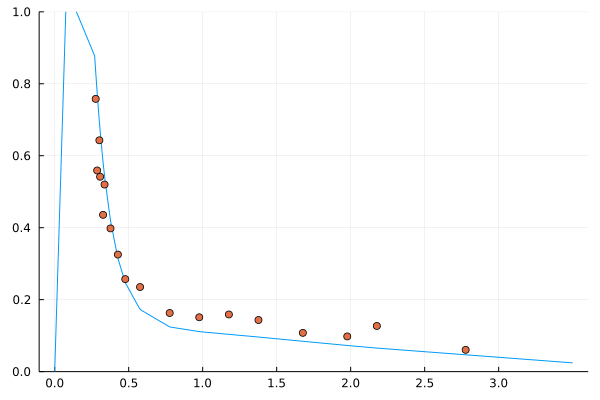

In [782]:
include("data.jl");
p0_Np = (
    μ_M_Np = μ_M_Np, 
    Γ_M_Np = Γ_M_Np, 
    blackbody_M_Np = blackbody_M_Np, 
    idxs_Np = idxs_Np, 
    idxs_Np_all = idxs_Np_all,
    multiplicities = multiplicities,
    idxs_Np_d = idxs_Np_d,
    μ_v1 = μ_v1, 
    μ_v2 = μ_v2, 
    τ_vacuum = τ_vacuum,
    t_span = t_span,
    ODT_loading_rate = ODT_loading_rate,
    X100_transfer_rate = X100_transfer_rate,
    X0110_transfer_rate = X0110_transfer_rate,
    R = R_Np
)

R_Np = zeros(Float64, n_Np_states + 1, n_Np_states + 1)
construct_rate_eqns_Np!(R_Np, p0_Np)

n0_Np = zeros(Float64, n_Np_states + 1)
n0_Np[end] = 1.0

tstops = [0.01, 80, 270, 272] .* 1e-3
prob = ODEProblem(rate_eqns!, n0_Np, p0_Np.t_span, p0_Np)
@time sol = DifferentialEquations.solve(prob, alg=DP5(), saveat=data.X100_xs, tstops=tstops, callback=cbs)

times = 0.0:10e-3:t_span[2]
sol_values = sol(times) .* 1.4

detectable = [sum(u[p0_Np.idxs_Np_d]) for u in sol_values]

plot(times, detectable, legend=nothing)
plot!(
    xticks=0.0:0.5:3.0,
    yticks=0.0:0.2:1.0,
    ylim=(0,1)
)
scatter!(data.X100_xs, data.X100_ys)

In [783]:
function grid_scan_Np!(grid_iterable_all, errors, grid_iterable, p0, data)
    
    new_errors = zeros(Float64, size(grid_iterable)...)
    add_to_grid = zeros(Bool, size(grid_iterable)...)
    
    n_states = length(p0.idxs_Np_all)
    n0 = zeros(Float64, n_states + 1)
    R = zeros(Float64, n_states + 1, n_states + 1)
    prob = ODEProblem(rate_eqns!, n0, p0.t_span, p0)
    
    n0[end] = 1.0
    
    # Times below do not include times for the last image
    # For X(000), assume immediate repumping after imaging
    tstops_X000 = [0.01, 80] .* 1e-3
    cbs_X000 = CallbackSet(cb_ODT_loading_on, cb_ODT_loading_off) 
    
    tstops_X100 = [0.01, 80, 270, 272] .* 1e-3
    cbs_X100 = CallbackSet(cb_ODT_loading_on, cb_ODT_loading_off, cb_turn_on_load_X100, cb_turn_off_load_X100)
    
    tstops_X0110 = [0.01, 80, 270, 370] .* 1e-3
    cbs_X0110 = CallbackSet(cb_ODT_loading_on, cb_ODT_loading_off, cb_turn_on_load_X0110, cb_turn_off_load_X0110)
    
    cart_indices = CartesianIndices(grid_iterable)
    @showprogress for idx in cart_indices
        params = grid_iterable[idx]
        add_to_grid[idx] = true

        p′ = NamedTuple{fieldnames(grid)}(params)
        p = (; p0..., p′...)
        construct_rate_eqns_Np!(p.R, p)
        
        new_prob = remake(prob, p=p)
        
        # Simulate with population starting in X(000), i.e., no transfer
        sol_X000 = DifferentialEquations.solve(new_prob, alg=DP5(), tstops=tstops_X000, saveat=data.X000_xs, callback=cbs_X000)
        X000_preds = [sum(u[p.idxs_Np_d]) for u in sol_X000.u[5:end]] .* p.n0_X000
        error_X000 = squared_error(data.X000_xs, data.X000_ys, X000_preds)
        
        # X(100) lifetime
        sol_X100 = DifferentialEquations.solve(new_prob, alg=DP5(), tstops=tstops_X100, saveat=data.X100_xs, callback=cbs_X100)
        X100_preds = [sum(u[p.idxs_Np_d]) for u in sol_X100.u[9:end]] .* p.n0_X100
        error_X100 = squared_error(data.X100_xs, data.X100_ys, X100_preds)

        # X(0110) lifetime
        sol_X0110 = DifferentialEquations.solve(new_prob, alg=DP5(), tstops=tstops_X0110, saveat=data.X0110_xs, callback=cbs_X0110)
        X0110_preds = [sum(u[p.idxs_Np_d]) for u in sol_X0110.u[9:end]] .* p.n0_X0110
        error_X0110 = squared_error(data.X0110_xs, data.X0110_ys, X0110_preds)

        error = error_X000 + error_X100 + error_X0110
        new_errors[idx] = error
            
#         print(round(i / length(grid_iterable), digits=2), " (", params, ")", ": ", round(error, digits=5), "\r")
#         flush(stdout)
          
    end
    
#     grid_iterable_all = [grid_iterable_all; grid_iterable[add_to_grid]]
#     errors = [errors; new_errors[add_to_grid]]
    return new_errors
end
;

In [784]:
include("data.jl");

In [905]:
μ_v1 = (0.25:0.01:0.35) .* 3.336e-30
μ_v2 = (0.28:0.01:0.40) .* 3.336e-30
τ_vacuum = 2.0:0.2:3.6
n0_X000 = 0.80:0.10:1.40
n0_X100 = 1.00:0.10:1.40
n0_X0110 = 1.00:0.10:1.80
X100_transfer_time = 0.5e-3:0.2e-3:1.5e-3
X0110_transfer_time = 40e-3:2e-3:50e-3
# imperfect_X100_prep = 0.00:0.05:0.25
# imperfect_X0110_prep = 0.55:0.05:0.85

grid = (
    μ_v1 = μ_v1,
    μ_v2 = μ_v2,
    τ_vacuum = τ_vacuum,
    n0_X000 = n0_X000,
    n0_X100 = n0_X100,
    n0_X0110 = n0_X0110 #,
#     X100_transfer_rate = 1 ./ X100_transfer_time,
#     X0110_transfer_rate = 1 ./ X0110_transfer_time
)

if @isdefined(grid_iterable_all)
    grid_iterable = collect(Iterators.product(grid...))
#     for grid_point in grid_iterable
#         if !(grid_point ∈ keys(grid_dict))
#             grid_dict[grid_point] = false
#         end
#     end
else
    grid_iterable_all = collect(Iterators.product(grid...))
#     grid_dict = Dict((k, false) for k in grid_iterable_all)
#     grid_iterable = grid_iterable_all
    errors = zeros(Float64, size(grid_iterable_all)...)
end
;

In [906]:
using ProgressMeter
errors = grid_scan_Np!(grid_iterable_all, errors, grid_iterable, p0_Np, data);

Progress: 100%|█████████████████████████████████████████| Time: 0:04:32


In [907]:
min_error, best_params_idx = findmin(errors)
best_params = grid_iterable[best_params_idx]

# best_params = (
#     μ_v1 = 0.28 * 3.336e-30, 
#     μ_v2 = 0.28 * 3.336e-30, 
#     τ_vacuum = 2.1, 
#     n0_X000 = 1.12, 
#     n0_X100 = 1.6, 
#     n0_X0110 = 1.3, 
#     X100_transfer_rate = 1 ./ 0.4e-3,
#     X0110_transfer_rate = 1 ./ 20e-3
# )

p_Np′ = NamedTuple{fieldnames(grid)}(best_params)
p_Np = (; p0_Np..., p_Np′...)
p_Np′ |> display
p_Np′.μ_v1 / 3.336e-30 |> display
p_Np′.μ_v2 / 3.336e-30 |> display
min_error |> display

(μ_v1 = 9.6744e-31, μ_v2 = 1.30104e-30, τ_vacuum = 3.4, n0_X000 = 1.1, n0_X100 = 1.2, n0_X0110 = 1.4)

0.29

0.39

0.0505593771798709

In [908]:
function minimum_grid_errors(idx, errors)
    dims = setdiff(1:length(size(errors)), idx)
    return minimum(errors, dims=dims)
end
;

In [909]:
function get_grid_values(idx, grid_iterable)
    
    n = Int(size(grid_iterable)[idx])
    m = length(size(grid_iterable))
    grid_idx = ones(Int, m)
    values = Float64[]
    for i ∈ 1:n
        grid_idx[idx] = i
        val = grid_iterable[grid_idx...]
        push!(values, val[idx])
    end
    return values
end
;

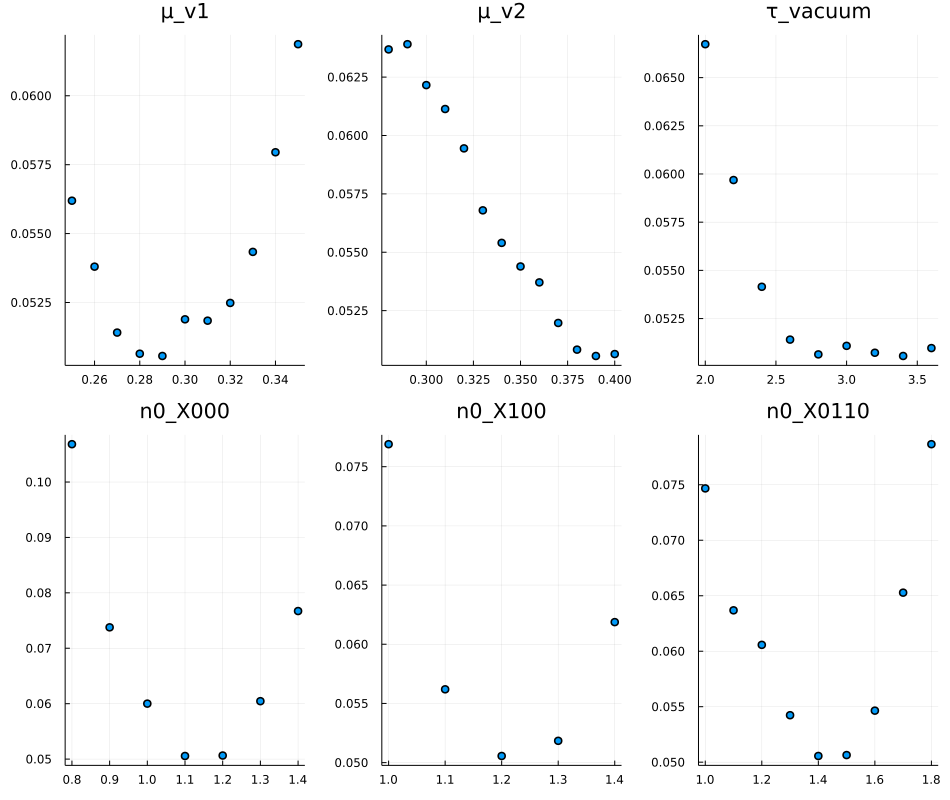

In [910]:
pls = []
for i ∈ 1:length(size(grid_iterable))
    grid_vals = get_grid_values(i, grid_iterable)
    minima = minimum_grid_errors(i, errors)
    minima = dropdims(minima, dims = (findall(size(minima) .== 1)...,))
    param = keys(grid)[i]
    if param ∈ [:μ_v1, :μ_v2]
        grid_vals /= (3.336e-30)
    end
    if length(minima) > 1
        pl = scatter(grid_vals, minima, title=param, legend=nothing)
        push!(pls, pl)
    end
end
scatter(pls..., size=(950, 800))

In [911]:
n0_Np .= 0.0
n0_Np[end] = 1.0
construct_rate_eqns_Np!(p_Np.R, p_Np)
prob = ODEProblem(rate_eqns!, n0_Np, p_Np.t_span, p_Np)

tstops_X000 = [0.01, 80] .* 1e-3
cbs_X000 = CallbackSet(cb_ODT_loading_on, cb_ODT_loading_off) 

tstops_X100 = [0.01, 80, 270, 272] .* 1e-3
cbs_X100 = CallbackSet(cb_ODT_loading_on, cb_ODT_loading_off, cb_turn_on_load_X100, cb_turn_off_load_X100)

tstops_X0110 = [0.01, 80, 270, 370] .* 1e-3
cbs_X0110 = CallbackSet(cb_ODT_loading_on, cb_ODT_loading_off, cb_turn_on_load_X0110, cb_turn_off_load_X0110)
;

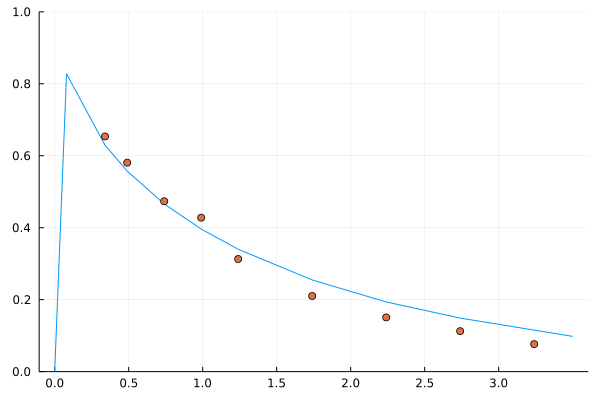

In [912]:
sol_X000 = DifferentialEquations.solve(
    prob, alg=DP5(), tstops=tstops_X000, saveat=data.X000_xs, callback=cbs_X000)

times = 0:10e-3:t_span[2]
sol_values = sol_X000(times) .* p_Np.n0_X000

detectable = [sum(u[p_Np.idxs_Np_d]) for u in sol_values]
detectable_X000 = [sum(u[p_Np.idxs_Np_d[1]]) for u in sol_values]

plot(times, detectable, legend=nothing)
# plot!(times, detectable_X000, legend=nothing)
plot!(
    xticks=0.0:0.5:3.0,
    yticks=0.0:0.2:1.0,
    ylim=(0,1)
)
scatter!(data.X000_xs, data.X000_ys)

  0.000292 seconds (68 allocations: 27.812 KiB)


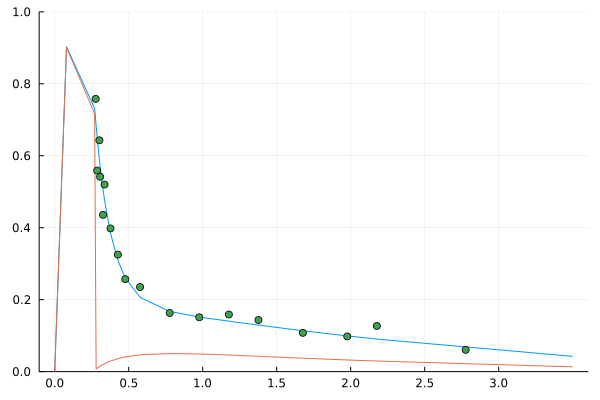

In [913]:
@time sol_X100 = DifferentialEquations.solve(
    prob, alg=DP5(), tstops=tstops_X100, saveat=data.X100_xs, callback=cbs_X100)

times = 0:10e-3:t_span[2]
sol_values = sol_X100(times) .* p_Np.n0_X100

detectable = [sum(u[p_Np.idxs_Np_d]) for u in sol_values]
detectable_X000 = [sum(u[p_Np.idxs_Np_d[1]]) for u in sol_values]

plot(times, detectable, legend=nothing)
plot!(times, detectable_X000, legend=nothing)
plot!(
    xticks=0.0:0.5:3.0,
    yticks=0.0:0.2:1.0,
    ylim=(0,1)
)
scatter!(data.X100_xs, data.X100_ys)

  0.000287 seconds (62 allocations: 23.828 KiB)


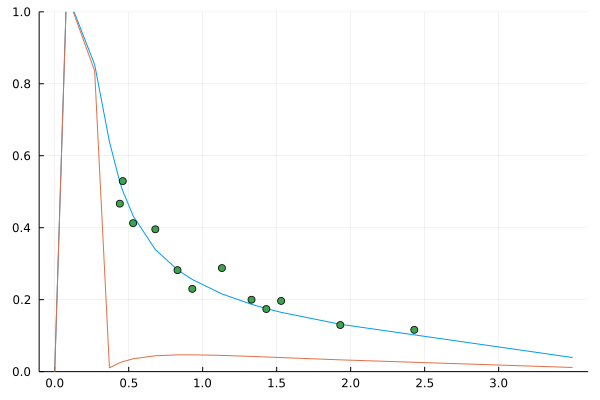

In [914]:
@time sol_X0110 = DifferentialEquations.solve(
    prob, alg=DP5(), tstops=tstops_X0110, saveat=data.X0110_xs, callback=cbs_X0110)

times = 0:10e-3:t_span[2]
sol_values = sol_X0110(times) .* p_Np.n0_X0110

detectable = [sum(u[p_Np.idxs_Np_d]) for u in sol_values]
detectable_X000 = [sum(u[p_Np.idxs_Np_d[1]]) for u in sol_values]

plot(times, detectable, legend=nothing)
plot!(times, detectable_X000, legend=nothing)
plot!(
    xticks=0.0:0.5:3.0,
    yticks=0.0:0.2:1.0,
    ylim=(0,1)
)
scatter!(data.X0110_xs, data.X0110_ys)

### Trying out parallelizing grid scan

In [125]:
# function prob_func(prob, i, repeat)
#     p′ = NamedTuple{fieldnames(grid)}(params)
#     p = (; prob.p..., p′...)
    
#     R = zeros(Float64, length(p.basis), length(p.basis))
#     construct_rate_eqns!(R, p)

#     n0 = zeros(Float64, length(p.basis))
#     n0[p.idxs_d[1]] = p.n0

#     prob = ODEProblem(rate_eqns!, n0, p.t_span, R)

In [126]:
# EnsembleProblem(
#     output_func = (sol, i) -> (sol, i)
#     prob_func = (prob, i, repeat) -> 
#     )

In [127]:
grid_iterable = collect(Iterators.product(grid...))

n0 = zeros(Float64, length(p0.basis))
R = zeros(Float64, length(p0.basis), length(p0.basis))
prob = ODEProblem(rate_eqns!, n0, p0.t_span, R)
probs = []

# Define all problems
for i in eachindex(grid_iterable)
    params = grid_iterable[i]
    p′ = NamedTuple{fieldnames(grid)}(params)
    p = (; p0..., p′...)
    n0[p.idxs_d[1]] = p.n0
    construct_rate_eqns!(R, p)
    new_prob = remake(prob, u0=n0, p=R)
    push!(probs, deepcopy(new_prob))
end

length(probs)

LoadError: type NamedTuple has no field n0

In [251]:
const probs_const = probs;

In [263]:
prob_func(prob, i, repeat) = probs[i]
output_func(sol, i) = (0.0, false)
;

In [264]:
ens_prob = EnsembleProblem(prob, prob_func=prob_func, output_func=output_func);

In [271]:
@time DifferentialEquations.solve(ens_prob, DP5(), EnsembleSerial(), trajectories=length(probs))

  9.502544 seconds (1.86 M allocations: 4.710 GiB, 4.57% gc time, 9.36% compilation time)


EnsembleSolution Solution of length 231 with uType:
Float64

In [270]:
@time DifferentialEquations.solve(ens_prob, DP5(), EnsembleThreads(), trajectories=length(probs))

 18.326245 seconds (120.94 k allocations: 4.420 GiB, 2.35% gc time, 0.74% compilation time)


EnsembleSolution Solution of length 231 with uType:
Float64

In [ ]:
sol = DifferentialEquations.solve(prob)

In [181]:
using Distributed

In [211]:
# addprocs(3)
@everywhere using DifferentialEquations
@everywhere probs = $probs
@everywhere using LinearAlgebra
nprocs()

4

In [214]:
@time Threads.@threads for prob in probs
    sol = DifferentialEquations.solve(prob)
end

169.018770 seconds (93.75 k allocations: 8.680 GiB, 1.43% gc time, 0.01% compilation time)


In [247]:
@time for prob in probs
    sol = DifferentialEquations.solve(prob, alg=DP5())
end

  7.964796 seconds (41.19 k allocations: 360.898 MiB, 0.29% gc time)
